In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import os
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [2]:
picture_size=48
folder_path="G:/6thsem/project/code/images/images/"

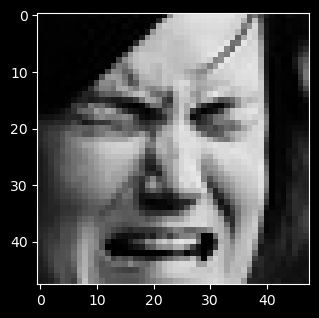

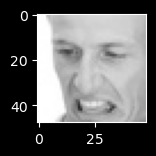

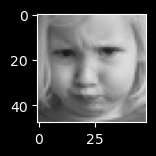

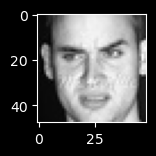

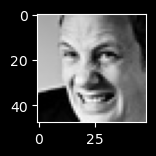

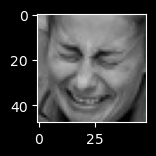

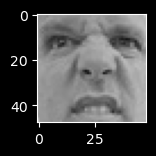

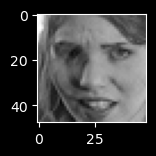

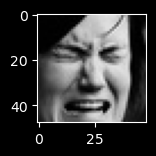

In [3]:
expression = 'disgust'
plt.style.use('dark_background')
plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,i)
    img=load_img(folder_path +"train/"+ expression +"/"+
                 os.listdir(folder_path + "train/" + expression)[i],target_size=(picture_size,picture_size))
    plt.imshow(img)
    plt.show()

In [4]:
batch_size =128
datagen_train =ImageDataGenerator()
datagen_val = ImageDataGenerator()
train_set = datagen_train.flow_from_directory(folder_path+"train",target_size=(picture_size,picture_size),
                                             color_mode="grayscale",batch_size=batch_size,
                                             class_mode='categorical',shuffle=True)
test_set = datagen_val.flow_from_directory(folder_path+"validation",target_size=(picture_size,picture_size),
                                          color_mode="grayscale",batch_size=batch_size,class_mode='categorical',
                                           shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
no_of_classes=7
model = Sequential()
#1st cnn layer
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

#2nd cnn layer
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#3rd cnn layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

#fully connected layer 1nd layer

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation='softmax'))

opt =Adam(lr=0.0001)
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()